In [1]:
# Loading required modules
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

import ROOT

Welcome to JupyROOT 6.22/08


In [2]:
file_dir = "../results/run_1_1000000/"

print(file_dir, flush = True)
#file_dir = "../../../lowmass-bat/results/4-180_pseudodata_NRmig_central_statonly_4.52_100000/"

file = ROOT.TFile.Open(file_dir + "neutrinofit_mcmc.root", "READ")

signal = True

mctree = file.neutrinofit_parameters

par_name = np.array([])
for ev in mctree:
    tmp = ev.nbins
for ev in mctree:
    par_name = np.append(par_name, ev.name)

mctree = file.neutrinofit_mcmc

mctree.GetBranch("Chain").SetName("chain")
mctree.GetBranch("Iteration").SetName("iteration")
mctree.GetBranch("Phase").SetName("phase")
mctree.GetBranch("LogProbability").SetName("log_probability")
mctree.GetBranch("LogPrior").SetName("log_prior")
mctree.GetBranch("LogLikelihood").SetName("log_likelihood")
mctree.GetBranch("LogPrior").SetName("log_prior")
mctree.GetBranch("LogLikelihood").SetName("log_likelihood")

nptree = mctree.AsMatrix()
phase = np.transpose(nptree)[2]

chains = {}
for i, par in enumerate(par_name):
    chains[par.split('\x00')[0]] = np.transpose(nptree)[4+i][np.where(phase == 1)]

../results/run_1_1000000/


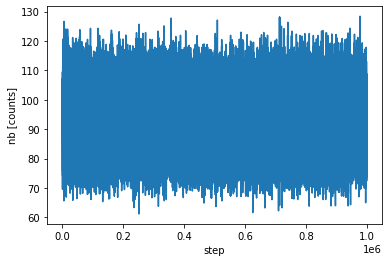

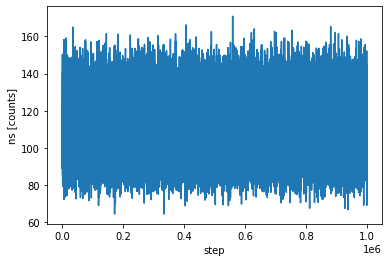

In [3]:
plt.plot(chains['nb'])
plt.xlabel('step')
plt.ylabel('nb [counts]')
plt.show()
plt.plot(chains['ns'])
plt.xlabel('step')
plt.ylabel('ns [counts]')
plt.show()

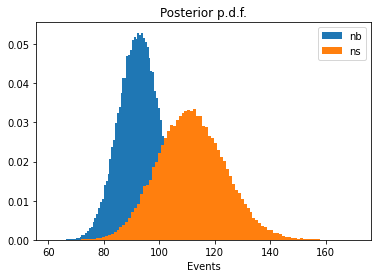

In [4]:
plt.hist(chains['nb'], bins = 100, density = True, label = 'nb')
plt.hist(chains['ns'], bins = 100, density = True, label = 'ns')
plt.title('Posterior p.d.f.')
plt.xlabel('Events')
plt.legend()
plt.show()

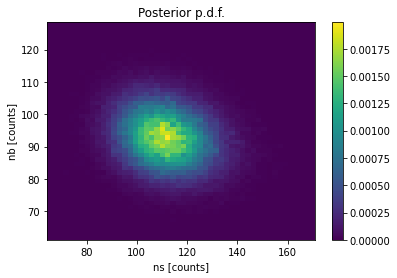

In [5]:
plt.hist2d(chains['ns'], chains['nb'], density = True, bins = [50, 50])
plt.colorbar()
plt.title('Posterior p.d.f.')
plt.xlabel('ns [counts]')
plt.ylabel('nb [counts]')
plt.show()